In [1]:
import numpy as np
import matplotlib.pyplot as plt

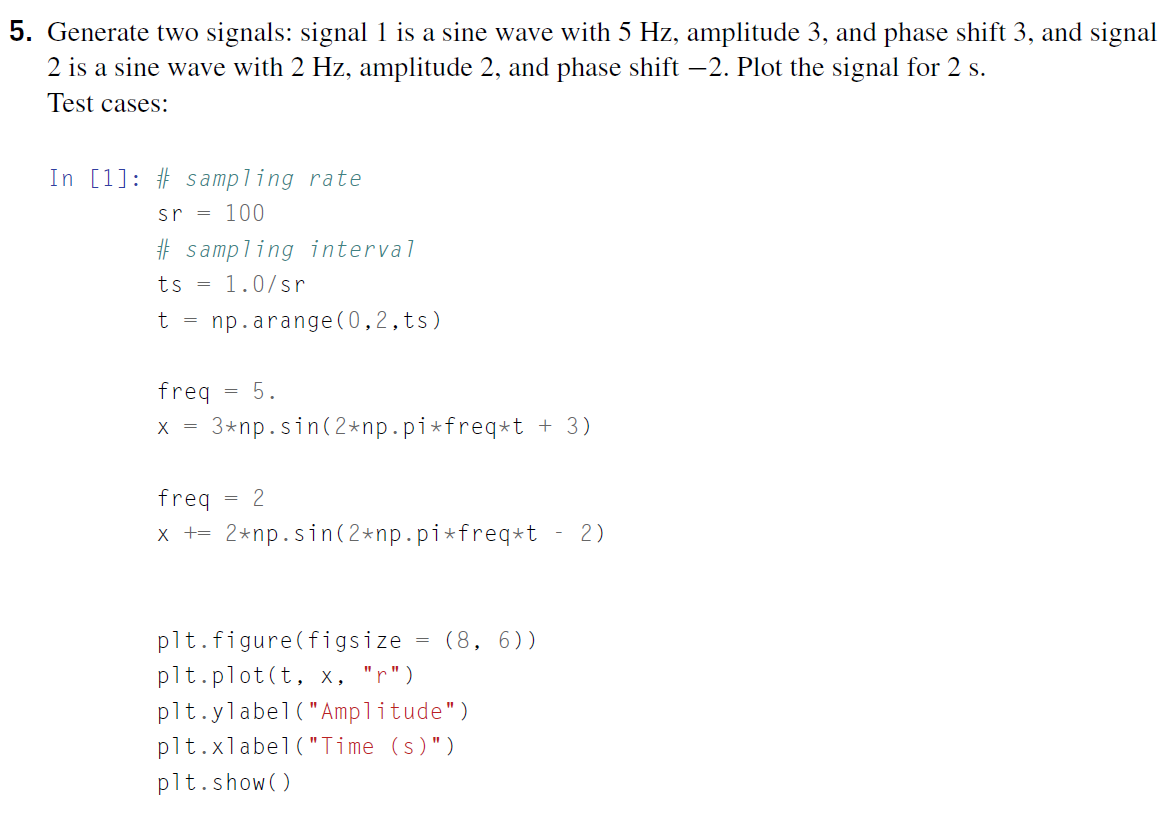

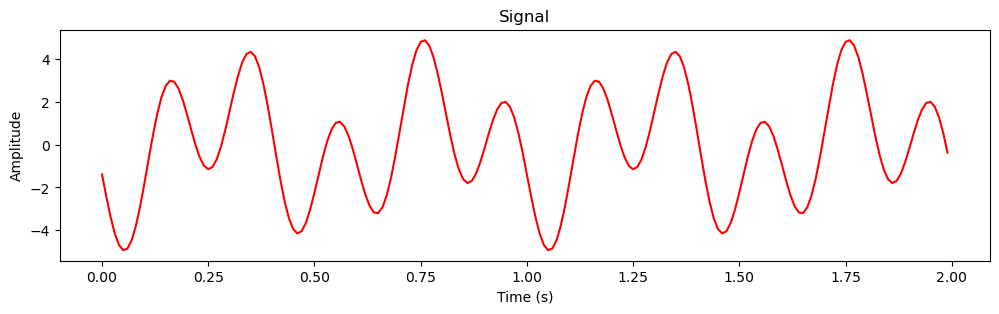

In [2]:
# sampling rate
sr = 100 

# sampling interval
ts = 1.0/sr
t = np.arange(0,2,ts)

freq = 5.
x = 3*np.sin(2*np.pi*freq*t + 3) 

freq = 2
x += 2*np.sin(2*np.pi*freq*t - 2)

plt.figure(figsize = (12, 3))
plt.plot(t, x, "r")
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.title('Signal')
plt.show()

6. Sample the signal you generated in Problem 5 using a sampling rate 5, 10, 20, 50, and 100 Hz, and see the differences between different sampling rates.

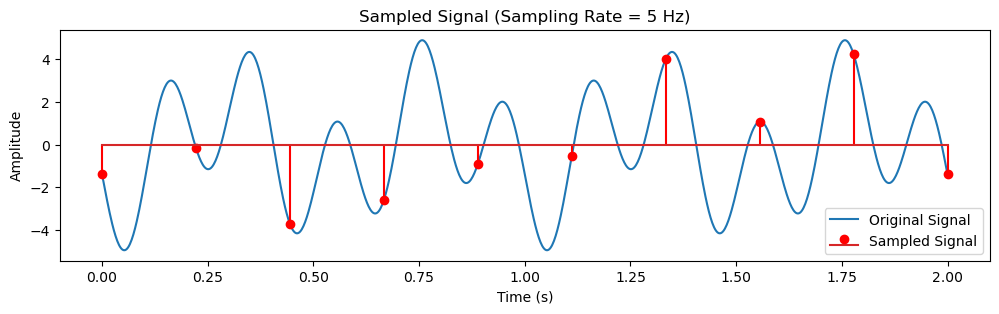

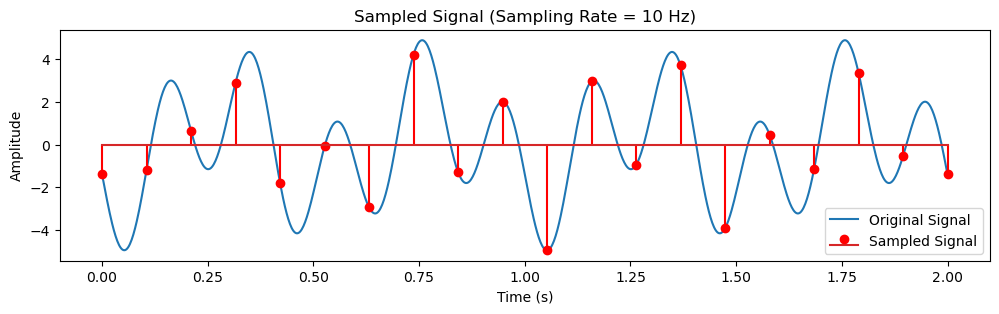

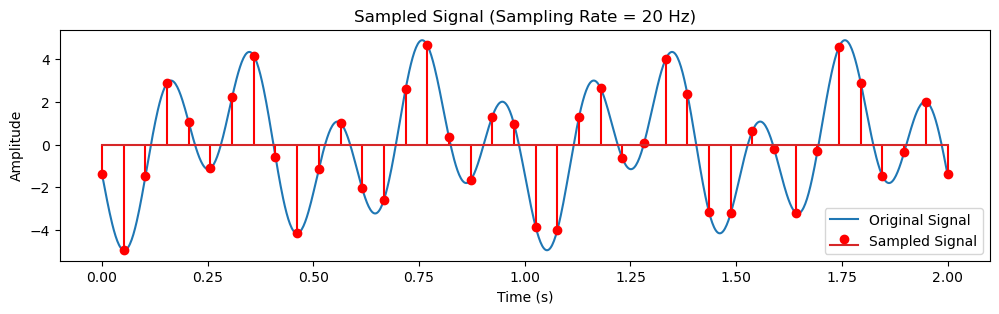

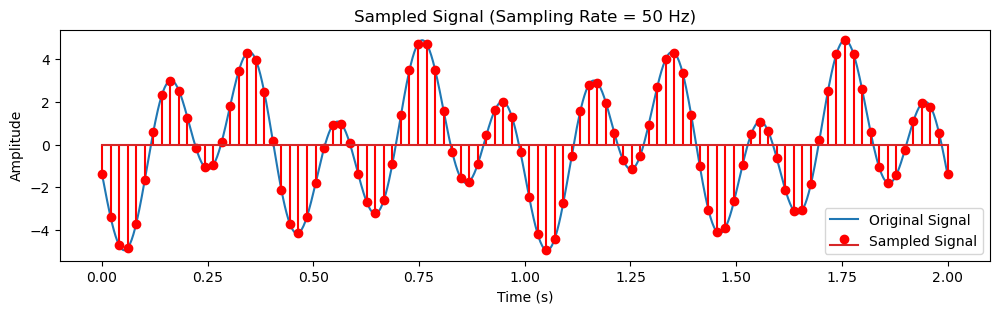

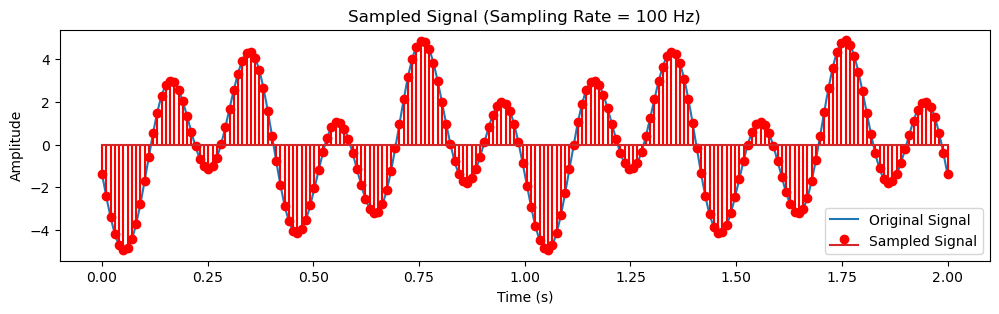

In [3]:
# Define the signal parameters
srates = [5, 10, 20, 50, 100]  # Sampling rates to test

# Generate the time array for 2 seconds
t = np.linspace(0, 2, 1000)

# Generate the original signal
freq1 = 5.0
amp1 = 3.0
phase_shift1 = 3.0
freq2 = 2.0
amp2 = 2.0
phase_shift2 = -2.0
signal1 = amp1 * np.sin(2 * np.pi * freq1 * t + phase_shift1)
signal2 = amp2 * np.sin(2 * np.pi * freq2 * t + phase_shift2)
original_signal = signal1 + signal2

def signal(sr):
    ts = 1.0 / sr  # Sampling interval
    n_samples = int(2 * sr)  # Number of samples
    t_sampled = np.linspace(0, 2, n_samples)  # Time array for sampling
    sampled_signal = amp1 * np.sin(2 * np.pi * freq1 * t_sampled + phase_shift1) + \
                     amp2 * np.sin(2 * np.pi * freq2 * t_sampled + phase_shift2)
    return t_sampled, sampled_signal

for sr in srates:
    t_sampled, sampled_signal = signal(sr)    

    fig=plt.figure(figsize=(12,3))
    plt.plot(t, original_signal, label='Original Signal')
    plt.stem(t_sampled, sampled_signal, 'r', markerfmt='ro', label='Sampled Signal')
    plt.ylabel("Amplitude")
    plt.xlabel("Time (s)")
    plt.title(f"Sampled Signal (Sampling Rate = {sr} Hz)")
    plt.legend()
plt.show()

10. Use the DFT function and inverse DFT we implemented, and generate the amplitude spectrum for the signal you generated in Problem 5.                                                                                                             
Normalize the DFT amplitude to get the correct corresponding time domain amplitude.

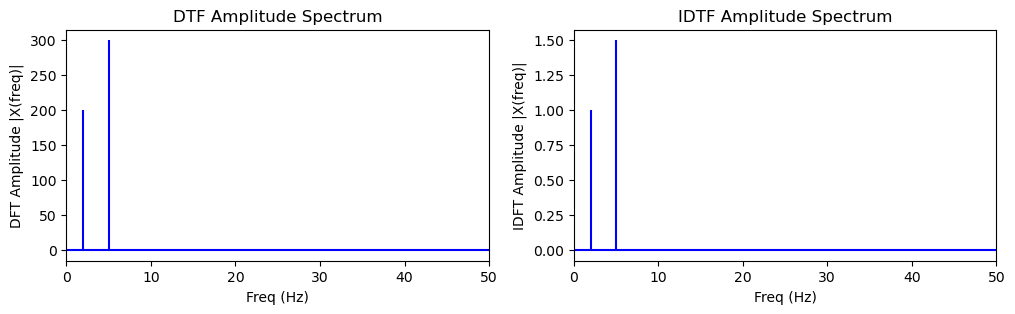

In [4]:
# Implement DFT function
def dft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x)
    return X

# Implement inverse DFT function
def idft(X):
    N = len(X)
    k = np.arange(N)
    n = k.reshape((N, 1))
    e = np.exp(2j * np.pi * k * n / N)
    x = np.dot(e, X) / N
    return x

# Generate the signal
sr = 100
ts = 1.0 / sr
t = np.arange(0, 2, ts)
freq = 5
x1 = 3 * np.sin(2 * np.pi * freq * t + 3)
freq = 2
x2 = 2 * np.sin(2 * np.pi * freq * t - 2)
x = x1 + x2

X1 = dft(x)
# calculate the frequency
N1 = len(X1)
n1 = np.arange(N1)
T1 = N1/sr
freq_dft = n1/T1
norm_X_dft = abs(X1)

X2 = idft(x)
# calculate the frequency
N2 = len(X2)
n2 = np.arange(N2)
T2 = N2/sr
freq_idft = n2/T2
norm_X_idft = abs(X2)

# Plot the normalized amplitude spectrum
plt.figure(figsize=(12, 3))
plt.subplot(121)
plt.stem(freq_dft, norm_X_dft, "b", markerfmt=" ", basefmt="-b")
plt.xlim(0, sr/2) # real part
plt.xlabel("Freq (Hz)")
plt.ylabel("DFT Amplitude |X(freq)|")
plt.title("DTF Amplitude Spectrum")

plt.subplot(122)
plt.stem(freq_idft, norm_X_idft, "b", markerfmt=" ", basefmt="-b")
plt.xlim(0, sr/2)  # real part
plt.xlabel("Freq (Hz)")
plt.ylabel("IDFT Amplitude |X(freq)|")
plt.title("IDTF Amplitude Spectrum")
plt.show()

12. Use the fft and ifft function from scipy to repeat Problem 10

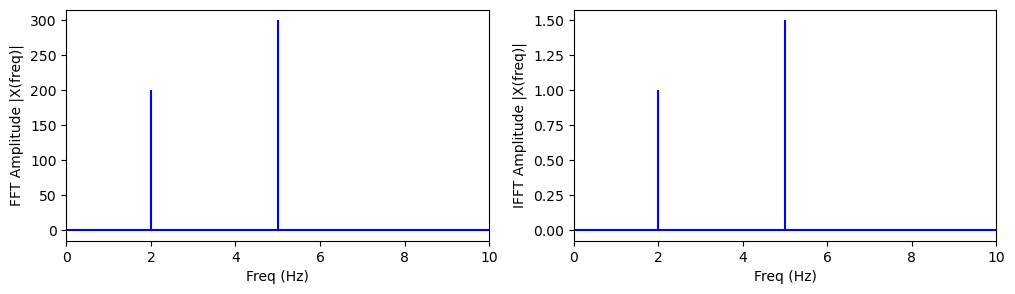

In [5]:
from scipy.fft import fft, ifft

# Generate the signal
sr = 100
ts = 1.0 / sr
t = np.arange(0, 2, ts)
freq = 5
x1 = 3 * np.sin(2 * np.pi * freq * t + 3)
freq = 2
x2 = 2 * np.sin(2 * np.pi * freq * t - 2)
x = x1 + x2

# Calculate FFT of the signal
X_fft = fft(x)
N_fft = len(X_fft)
n_fft = np.arange(N_fft)
T_fft = N_fft/sr
freq_fft = n_fft/T_fft
plt.figure(figsize = (12, 3))

plt.subplot(121)
plt.stem(freq_fft, abs(X_fft), "b", markerfmt=" ", basefmt="-b")
plt.xlabel("Freq (Hz)")
plt.ylabel("FFT Amplitude |X(freq)|")
plt.xlim(0, 10)

# Calculate IFFT of the signal
X_ifft = ifft(x)
N_ifft = len(X_ifft)
n_ifft = np.arange(N_ifft)
T_ifft = N_ifft/sr
freq_ifft = n_ifft/T_ifft

plt.subplot(122)
plt.stem(freq_ifft, abs(X_ifft), "b", markerfmt=" ", basefmt="-b")
plt.xlabel("Freq (Hz)")
plt.ylabel("IFFT Amplitude |X(freq)|")
plt.xlim(0, 10)
plt.show()

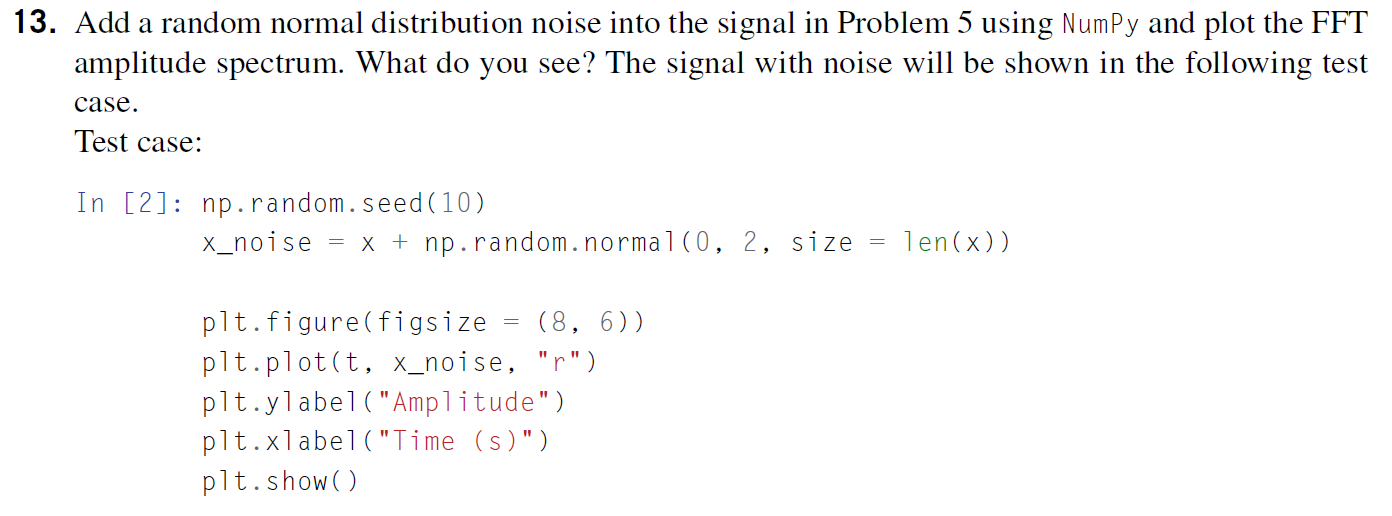

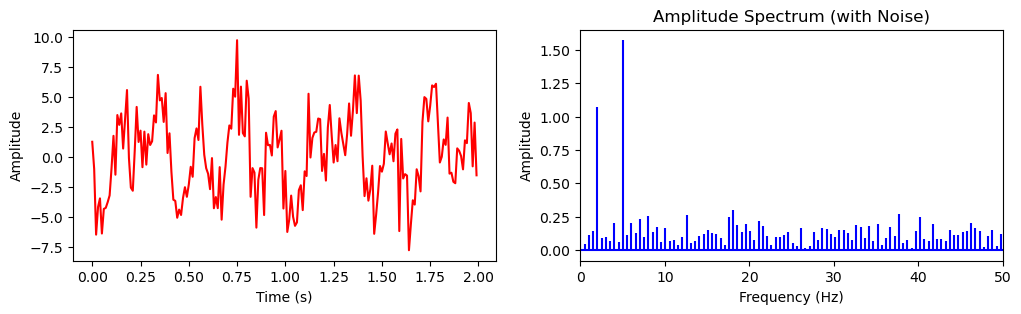

In [6]:
# Add random normal distribution noise to the signal
np.random.seed(10)
x_noise = x + np.random.normal(0, 2, size = len(x))

plt.figure(figsize = (12,3))
plt.subplot(121)
plt.plot(t, x_noise, "r")
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")

# Calculate FFT of the noisy signal
X_noise = fft(x_noise)

# Normalize the FFT amplitude
norm_X_noise = abs(X_noise)/len(X_noise)

# Generate frequency axis for the amplitude spectrum
freq_axis = np.linspace(0, sr, len(X_noise))

# Plot the normalized amplitude spectrum
plt.subplot(122)
plt.stem(freq_axis, norm_X_noise, "b", markerfmt=" ", basefmt="-b")
plt.xlim(0, sr/2)                 # real part 
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Amplitude Spectrum (with Noise)")
plt.show()